# 线性回归

此Notebook配合Andrew Ng "Machine Learning"中线性回归部分学习使用.
- 作者: 麦旋风超好吃
- 测试用Python版本: 3.12
- 机器学习路径: [https://ml.ricolxwz.de/%E7%AE%97%E6%B3%95/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E6%A8%A1%E5%9E%8B/](https://ml.ricolxwz.de/%E7%AE%97%E6%B3%95/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E6%A8%A1%E5%9E%8B/)
- 参考资料: [https://share.ricolxwz.io/machine-learning/notebook/andrew-ng/ex1_linear_regression.ipynb](https://share.ricolxwz.io/machine-learning/notebook/andrew-ng/ex1_linear_regression.ipynb)
- 联络方式: ricol.xwz@outlook.com
- 备注: 请替换下方导入函数中的链接

## 前期准备

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple, List

In [28]:
df = pd.read_csv('https://rshare.ricolxwz.io/machine-learning/dataset/andrew-ng/linear-regression/ex1data1.txt', names=['population', 'profit'])

In [3]:
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


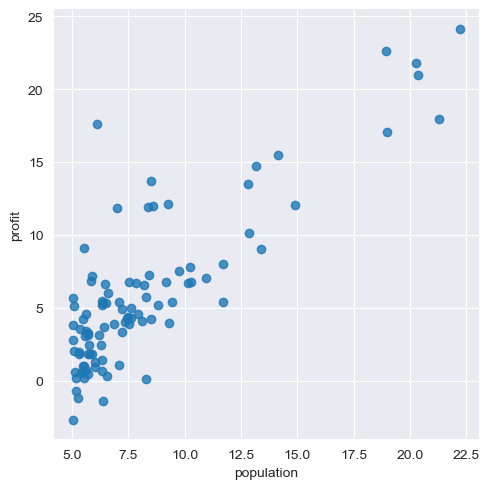

In [6]:
sns.lmplot(x='population', y='profit', data=df, fit_reg=False)

## 预估模型/定义读取函数

预估模型为单变量线性回归, 将模型表示为: $h_{\theta}(x)=\theta_0+\theta_1x_1$.

为了能够简化公式, 引入$x_0=1$, 将公式转化为$h_{\theta}(x)=\theta_0x_0+\theta_1x_1$, 这个时候一共有2个特征, 2个参数. 用矩阵X表示特征, 用矩阵$\theta$表示参数, 则有$h_{\theta}(x)=\theta^TX$, 其中上标$T$代表转置矩阵.

根据上面的思路, 可以写一个读取特征/标签的函数, 附带一个实现特征缩放的函数.

### 读取特征函数

In [7]:
def get_features(df: pd.DataFrame) -> np.ndarray: # 读取特征(总共2个)
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # 生成一个m行1列的DF, 表示x0特征
    data = pd.concat([ones, df], axis=1) # 合并x0特征和x1特征
    return data.iloc[:, :-1].to_numpy() # 去掉标签之后返回一个numpy数组

### 读取标签函数

In [8]:
def get_label(df: pd.DataFrame) -> np.ndarray:
    return df.iloc[:, -1].to_numpy() # 返回标签列

### 特征缩放函数

In [9]:
def normalize_feature(df: pd.DataFrame) -> pd.DataFrame:
    return df.apply(lambda column: (column - column.mean()) / column.std())

## 计算代价函数

$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$

假设我们有m对样本, n个特征.

In [10]:
data = df
X = get_features(data)
print(X.shape, type(X))
Y = get_label(data)
print(Y.shape, type(Y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [11]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [12]:
Y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

需要传入一个参数数组θ, 与特征进行点击运算, 然后得到的预估值与实际值平方, 对于m对样本, 累加m次平方后的数据然后除以2m.

现在指定参数数组的起始状态为0, 0, 这个就是下山的起始位置.

In [13]:
theta = np.zeros(X.shape[1]) # theta的列数需要等于特征的数量, 即n
print(theta)

[0. 0.]


In [14]:
def lr_cost(theta: np.ndarray, X: np.ndarray, Y: np.ndarray) -> np.float64:
    m = X.shape[0] # 取得样本数量
    inner = X @ theta - Y # X形状为(m, n), theta形状为(n, ),  点积之后的形状是(m, )
    square_sum = inner @ inner # 求平方操作
    cost = square_sum / (2 * m)
    return cost

In [15]:
lr_cost(theta, X, Y)

np.float64(32.072733877455676)

## 批量梯度下降

$\begin{aligned}{{\theta }_{j}} &:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right) \\ &:= {{\theta }_{j}}-\alpha \frac{1}{m} \sum^{m}_{i=1}\left( h_\theta \left(x^{(i)}\right) -y^{(i)}  \right)x^{(i)}_j \end{aligned}$

注意: 对于所有的j, 需要同时更新θj

### 梯度函数

In [16]:
def gradient(theta: np.ndarray, X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """
    计算梯度, 也就是J(θ)的偏导数
    """
    m = X.shape[0]
    inner = X.T @ (X @ theta - Y) # (m, n).T = (n, m); (n, m) @ (m, ) -> (n, )
    return inner / m

### 批量梯度下降函数

In [17]:
def batch_gradient_decent(theta: np.ndarray, X: np.ndarray, Y: np.ndarray, epoch: int, alpha: float = 0.01) -> Tuple[np.ndarray, List[np.float64]]:
    """
    :param epoch: 批处理的轮数
    :param alpha: 学习率
    """
    cost_data = [lr_cost(theta, X, Y)] # 该参数用于记录梯度下降中cost的变化
    _theta = theta.copy() # 拷贝一份, 不和原来的theta混淆
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, Y) # 批量梯度下降, 所有的参数同时更新
        cost_data.append(lr_cost(_theta, X, Y)) # 计算梯度下降后的cost, 记录在cost_data中
    return _theta, cost_data

### 执行批量梯度下降

这里, 我们指定批处理500次, 这是因为500次之后, 我们认为已经接近局部极小值, 两个偏导数趋近于0.

In [18]:
epoch = 500 # 指定批处理500次
final_theta, cost_data = batch_gradient_decent(theta, X, Y, epoch)

#### 看一下最终的参数数组

In [19]:
final_theta

array([-2.28286727,  1.03099898])

#### 看一下cost的变化过程

可以看到在过程中, cost是不断下降的, 也就是不断下山. 一开始的cost是32.072733877455676, 最后的cost是4.7138095311168655.

In [20]:
cost_data

[np.float64(32.072733877455676),
 np.float64(6.737190464870009),
 np.float64(5.9315935686049555),
 np.float64(5.901154707081388),
 np.float64(5.895228586444221),
 np.float64(5.890094943117332),
 np.float64(5.885004158443646),
 np.float64(5.8799324804914175),
 np.float64(5.874879094762575),
 np.float64(5.869843911806388),
 np.float64(5.8648268653129305),
 np.float64(5.859827889932181),
 np.float64(5.854846920572289),
 np.float64(5.849883892376587),
 np.float64(5.844938740722034),
 np.float64(5.840011401218361),
 np.float64(5.835101809707226),
 np.float64(5.830209902261388),
 np.float64(5.825335615183862),
 np.float64(5.820478885007099),
 np.float64(5.815639648492152),
 np.float64(5.810817842627869),
 np.float64(5.806013404630044),
 np.float64(5.80122627194063),
 np.float64(5.796456382226899),
 np.float64(5.791703673380653),
 np.float64(5.786968083517396),
 np.float64(5.782249550975539),
 np.float64(5.777548014315596),
 np.float64(5.772863412319382),
 np.float64(5.768195683989212),
 np.f

#### 最终的cost

In [21]:
lr_cost(final_theta, X, Y)

np.float64(4.7138095311168655)

## 查看模型效果

In [22]:
Z = X @ final_theta

In [23]:
df_final = pd.concat([df, pd.DataFrame(Z, columns=['estimation'])], axis=1)

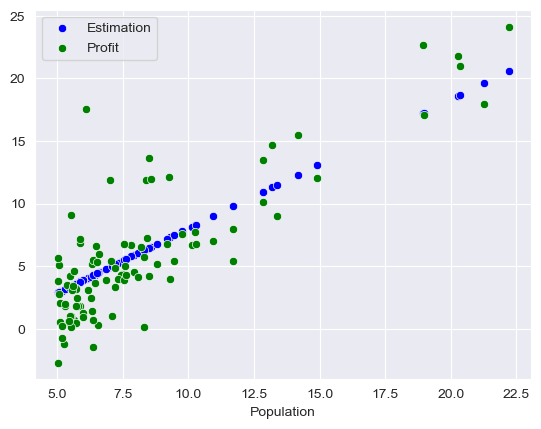

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(x='population', y='estimation', data=df_final, ax=ax, color='blue', label="Estimation")
sns.scatterplot(x='population', y='profit', data=df_final, ax=ax, color="green", label="Profit")
ax.set_xlabel("Population")
ax.set_ylabel("")
plt.show()